# Specialize in Data Science
## NLP

**1. Finding a dataset for sentiment classification;**

Proje: https://thecleverprogrammer.com/2022/08/29/process-of-nlp-using-python/

Veri: https://www.kaggle.com/datasets/chaudharyanshul/airline-reviews

Airline Reviews veri seti, toplamda 3701 giriş (satır) içermektedir ve 20 değişken (sütun) barındırmaktadır. Aşağıda veri setinin değişkenleri ve bazı ayrıntıları hakkında bilgi verilmiştir: <br>

Değişkenler
* Unnamed: 0: Girişlerin indeksini tutan bir tamsayı sütunu.
* OverallRating: Genel değerlendirme notu (float). 3696 geçerli değeri var.
* ReviewHeader: İnceleme başlığı (object).
* Name: İncelemeyi yapan kişinin adı (object).
* Datetime: İncelemenin yapıldığı tarih ve saat (object).
* VerifiedReview: İncelemenin doğrulanıp doğrulanmadığını gösteren bir boolean değeri.
* ReviewBody: İnceleme metni (object).
TypeOfTraveller: Seyahat eden kişinin tipi (object). 2930 geçerli değeri var.
* SeatType: Koltuk tipi (object). 3699 geçerli değeri var.
* Route: Uçuş güzergahı (object). 2926 geçerli değeri var.
* DateFlown: Uçuşun yapıldığı tarih (object). 2923 geçerli değeri var.
* SeatComfort: Koltuk konforu derecelendirmesi (float). 3585 geçerli değeri var.
* CabinStaffService: Kabin personeli hizmet derecelendirmesi (float). 3574 geçerli değeri var.
* GroundService: Yer hizmetleri derecelendirmesi (float). 2855 geçerli değeri var.
* ValueForMoney: Fiyat-performans değerlendirmesi (float). 3700 geçerli değeri var.
* Recommended: İncelemenin önerilip önerilmediği (object).
* Aircraft: Uçak modeli (object). 1922 geçerli değeri var.
* Food&Beverages: Yiyecek ve içecek derecelendirmesi (float). 3315 geçerli değeri var.
* InflightEntertainment: Uçuş içi eğlence derecelendirmesi (float). 2551 geçerli değeri var.
* Wifi&Connectivity: Wifi ve bağlantı derecelendirmesi (float). 609 geçerli değeri var.

Kullanım <br>
Bu veri seti, uçuş deneyimlerini analiz etmek, müşteri memnuniyetini değerlendirmek ve farklı değişkenler arasındaki ilişkileri incelemek için kullanılabilir. Özellikle, OverallRating, ReviewBody ve Recommended gibi değişkenler, duygu analizi ve öneri sistemleri geliştirmek için önemli olabilir.

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!ls /content

airline-reviews.zip    indir.png    sample_data		 wc_neutral.png
BA_AirlineReviews.csv  kaggle.json  stemmed_reviews.csv  wc.png
cloud.png	       like.png     wc_negative.png	 wc_positive.png


In [3]:
# Veri setini indirme
!kaggle datasets download -d chaudharyanshul/airline-reviews

Dataset URL: https://www.kaggle.com/datasets/chaudharyanshul/airline-reviews
License(s): MIT
airline-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# İndirilen ZIP dosyasını çıkarma
!unzip airline-reviews.zip

Archive:  airline-reviews.zip
replace BA_AirlineReviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
!ls /content

airline-reviews.zip    indir.png    sample_data		 wc_neutral.png
BA_AirlineReviews.csv  kaggle.json  stemmed_reviews.csv  wc.png
cloud.png	       like.png     wc_negative.png	 wc_positive.png


In [6]:
import pandas as pd

# Eğitim verisini yükleme
df = pd.read_csv('/content/BA_AirlineReviews.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3701 non-null   int64  
 1   OverallRating          3696 non-null   float64
 2   ReviewHeader           3701 non-null   object 
 3   Name                   3701 non-null   object 
 4   Datetime               3701 non-null   object 
 5   VerifiedReview         3701 non-null   bool   
 6   ReviewBody             3701 non-null   object 
 7   TypeOfTraveller        2930 non-null   object 
 8   SeatType               3699 non-null   object 
 9   Route                  2926 non-null   object 
 10  DateFlown              2923 non-null   object 
 11  SeatComfort            3585 non-null   float64
 12  CabinStaffService      3574 non-null   float64
 13  GroundService          2855 non-null   float64
 14  ValueForMoney          3700 non-null   float64
 15  Reco

In [8]:
df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [9]:
df["OverallRating"].value_counts()

,count
OverallRating,
1.0,865
2.0,424
3.0,406
8.0,370
10.0,330
7.0,313
9.0,310
4.0,254
5.0,234


In [10]:
# Duygu sınıflandırması
df.loc[df['OverallRating'] == 3, 'Sentiment'] = 'neutral'
df.loc[df['OverallRating'] < 3, 'Sentiment'] = 'negative'
df.loc[df['OverallRating'] > 3, 'Sentiment'] = 'positive'

In [11]:
df["Sentiment"].value_counts()

,count
Sentiment,
positive,2001
negative,1289
neutral,406
nan,5


In [12]:
df = df[['ReviewHeader','ReviewBody', 'Sentiment', 'OverallRating']]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ReviewHeader   3701 non-null   object 
 1   ReviewBody     3701 non-null   object 
 2   Sentiment      3701 non-null   object 
 3   OverallRating  3696 non-null   float64
dtypes: float64(1), object(3)
memory usage: 115.8+ KB


In [14]:
# Eksik değerlerin bulunduğu satırları kaldırma
df = df.dropna()

<Axes: xlabel='Sentiment'>

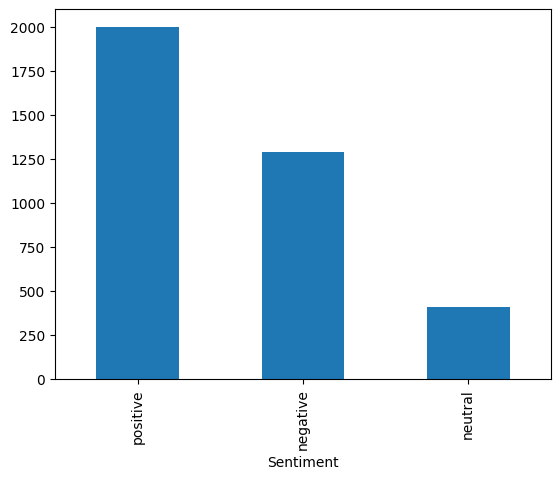

In [15]:
df["Sentiment"].value_counts().plot.bar()

**NLP Ön İşleme**

**2. Preparing the dataset by tokenization, stopwords removal, and stemming;**

HTML Karakterlerini Kaldırma

In [16]:
df["ReviewBody"] = df["ReviewBody"].str.replace(r"\&\#[0-9]+\;", repl="", regex=True)

In [17]:
# Metni küçük harfe çevirme ve özel karakterleri kaldırma
df["ReviewBody"] = df["ReviewBody"].str.lower() # Küçük harfe çevirme
df["ReviewBody"] = df["ReviewBody"].str.replace(r'\w*\d\w*', "", regex=True)#Sayısal Karakterleri Kaldırma
df["ReviewBody"] = df["ReviewBody"].str.replace("\n", "") #Yeni Satır Karakterlerini Kaldırma
df["ReviewBody"] = df["ReviewBody"].str.replace(r'https?://\S+|www\.\S+', "", regex=True) #URL'leri Kaldırma

In [18]:
df['ReviewBody'].isnull().sum()

0

Stopwordsleri Kaldırma

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("'", "") for word in stop_words]

print(f"örnek durak kelimeler: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["ReviewBody"] = df["ReviewBody"].apply(remove_stop_words)


örnek durak kelimeler: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 



Tokenleştirme

In [21]:
from nltk.tokenize import TreebankWordTokenizer

In [22]:
# Tokenizer'ı oluştur
tokenizer = TreebankWordTokenizer()

# DataFrame'den verileri tokenleştir
df['tokenized'] = [tokenizer.tokenize(str(i)) for i in df['ReviewBody'].values]

In [23]:
from textblob import TextBlob

Polarite ve Öznelik Hesaplama

In [24]:
df[['polarity', 'subjectivity']] = df["ReviewBody"].apply(lambda t: pd.Series(TextBlob(t).sentiment))

In [25]:
df

,ReviewHeader,ReviewBody,Sentiment,OverallRating,tokenized,polarity,subjectivity
0,"""Service level far worse then Ryanair""",hours takeoff received mail stating cryptic m...,negative,1.0,"[hours, takeoff, received, mail, stating, cryp...",-0.031667,0.309444
1,"""do not upgrade members based on status""",recently delay british airways bru lhr due sta...,neutral,3.0,"[recently, delay, british, airways, bru, lhr, ...",0.006944,0.367130
2,"""Flight was smooth and quick""","boarded time, took ages get runway due congest...",positive,8.0,"[boarded, time, ,, took, ages, get, runway, du...",0.140833,0.377500
3,"""Absolutely hopeless airline""","days flight, advised ba cancelled asked us re...",negative,1.0,"[days, flight, ,, advised, ba, cancelled, aske...",0.119722,0.578254
4,"""Customer Service is non existent""","traveled lisbon dream vacation, cruise portuga...",negative,1.0,"[traveled, lisbon, dream, vacation, ,, cruise,...",0.127604,0.294444
...,...,...,...,...,...,...,...
3696,British Airways customer review,bmi regional operated flight manchester heath...,negative,1.0,"[bmi, regional, operated, flight, manchester, ...",0.061364,0.363636
3697,British Airways customer review,lhr ham. purser addresses club passengers name...,positive,9.0,"[lhr, ham., purser, addresses, club, passenger...",0.173214,0.428571
3698,British Airways customer review,son worked british airways urged fly british a...,positive,5.0,"[son, worked, british, airways, urged, fly, br...",0.113542,0.256250
3699,British Airways customer review,london city-new york jfk via shannon really n...,positive,4.0,"[london, city-new, york, jfk, via, shannon, re...",0.340000,0.440000


Köklendirme

In [26]:
from nltk.stem import PorterStemmer
pr = PorterStemmer()

In [27]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [28]:
# 'reviewText' sütununu köklemeyi uygula
df['stemmed_review'] = df['ReviewBody'].apply(lambda x: lemmafn(x))

In [29]:
# Veriyi CSV dosyası olarak kaydetme
df.to_csv('stemmed_reviews.csv', index=False)

Word Cloud for negative Saved Successfully


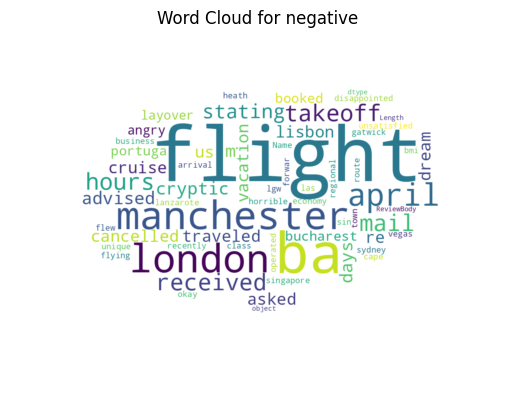

Word Cloud for neutral Saved Successfully


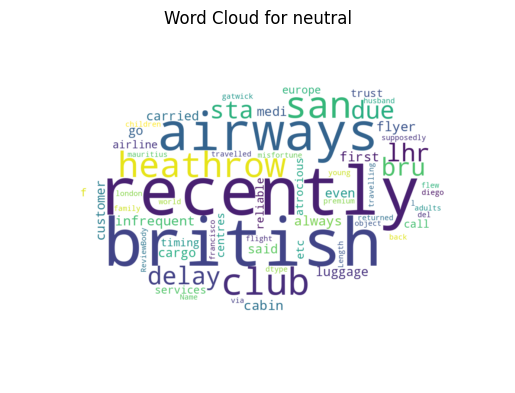

Word Cloud for positive Saved Successfully


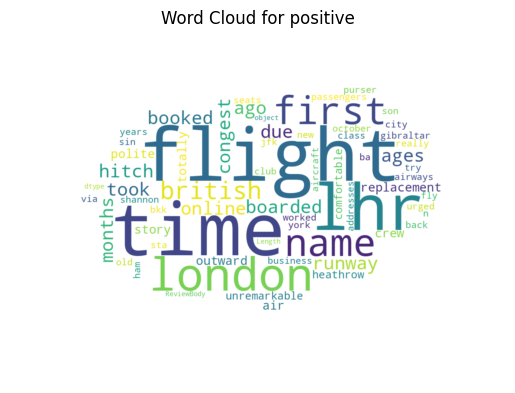

In [30]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Örnek veri çerçevesi
# df = pd.DataFrame(...)  # Burada veri çerçevenizi yükleyin

def create_wordcloud(text, mask, sentiment_label):
    mask = np.array(Image.open(mask))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
                   mask=mask,
                   max_words=2500,
                   stopwords=stopwords)
    wc.generate(str(text))

    # Kelime bulutunu kaydet
    file_name = f'wc_{sentiment_label}.png'
    wc.to_file(file_name)
    print(f'Word Cloud for {sentiment_label} Saved Successfully')

    # Kelime bulutunu göster
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_label}')
    plt.show()

# Olumsuz, nötr ve olumlu yorumları ayır
negative = df[df['Sentiment'] == 'negative']['ReviewBody']  # Olumsuz yorumlar
neutral = df[df['Sentiment'] == 'neutral']['ReviewBody']    # Nötr yorumlar
positive = df[df['Sentiment'] == 'positive']['ReviewBody']  # Olumlu yorumlar

# Kelime bulutları oluşturmak için mask dosyasını belirtin
mask_image_path = '/content/cloud.png'  # Buraya maske görselinizin yolunu girin

# Her bir duygu durumu için kelime bulutları oluşturun
create_wordcloud(negative, mask_image_path, 'negative')
create_wordcloud(neutral, mask_image_path, 'neutral')
create_wordcloud(positive, mask_image_path, 'positive')

**3. Text vectorization;**

In [31]:
print(df.isnull().sum())

ReviewHeader      0
ReviewBody        0
Sentiment         0
OverallRating     0
tokenized         0
polarity          0
subjectivity      0
stemmed_review    0
dtype: int64


In [32]:
print(df['Sentiment'].value_counts())

Sentiment
positive    2001
negative    1289
neutral      406
Name: count, dtype: int64


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(df['ReviewBody'])

**4. Training a classification model for sentiment classification;**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Veriyi eğitim ve test olarak ayır
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, df['Sentiment'], test_size=0.2, random_state=42)

# Modeli eğit
model = LogisticRegression()
model.fit(x_train, y_train)

# Test verisi ile tahmin yap
y_pred = model.predict(x_test)

# Sonuçları değerlendirin
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.70      0.80      0.75       256
     neutral       0.00      0.00      0.00       100
    positive       0.76      0.89      0.82       384

    accuracy                           0.74       740
   macro avg       0.49      0.56      0.52       740
weighted avg       0.64      0.74      0.69       740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Negatif Sınıf:
Precision: 0.72
Recall: 0.79
F1-Score: 0.75
Support: 256
Bu sınıf için modeliniz iyi çalışıyor. Hem precision hem de recall oranları oldukça makul.
Nötr Sınıf:
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Support: 100
Modeliniz, nötr sınıfı hiç tahmin edememiş. Bu nedenle precision ve recall değerleri sıfır. Bu, modelin bu sınıfı tanımadığını gösteriyor.
Pozitif Sınıf:
Precision: 0.76
Recall: 0.90
F1-Score: 0.82
Support: 384
Pozitif sınıf için model iyi çalışıyor; yüksek recall, modelin pozitif örnekleri iyi bir şekilde tanıdığını gösteriyor.
Genel Performans
Accuracy: 0.74 (Yüzde 74)
Macro Avg:
Bu, her sınıfın performansını eşit şekilde değerlendirir. Nötr sınıfın etkisi nedeniyle düşük.
Weighted Avg:
Sınıf destekleri dikkate alınarak hesaplanır. Bu durumda, yine nötr sınıfın sıfır performansı etkili oluyor.
Uyarılar
UndefinedMetricWarning: Bu uyarılar, "nötr" sınıf için tahmin yapılmadığı için precision ve F1 skorlarının hesaplanamadığını gösterir. Bu sınıf için herhangi bir tahmin yapılmadığı için bu değerler sıfır olarak ayarlanmıştır.

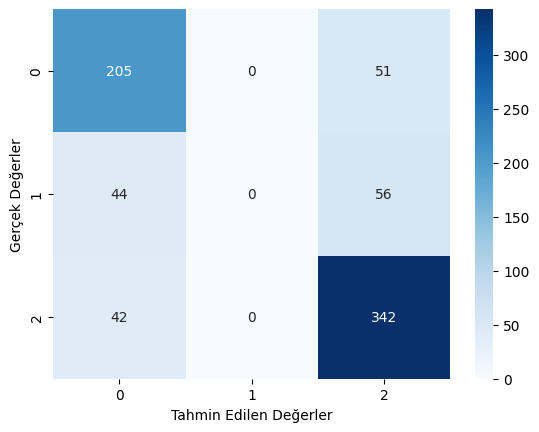

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()


Doğru Tahminler:
Negatif: 203
Nötr: 0
Pozitif: 346
Yanlış Tahminler:
Negatif olarak tahmin edilen nötr: 42
Negatif olarak tahmin edilen pozitif: 38
Nötr olarak tahmin edilen pozitif: 58
Sonuç
Bu matris, modelinizin performansı hakkında önemli bilgiler sunar. Özellikle, hangi sınıfların daha iyi tahmin edildiğini ve hangi sınıflarda zorluk yaşandığını anlamanıza yardımcı olur. Örneğin, modelinizin nötr örnekleri doğru tahmin etmede zorluk yaşadığını görebilirsiniz. Bu bilgileri kullanarak modelinizi geliştirebilir veya veri setinizi daha dengeli hale getirebilirsiniz.

In [41]:
# Modeli ve vektörleştiriciyi kaydetme
joblib.dump(model, 'trained_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [45]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Eğitilmiş modelin ve vektörleştirici nesnesinin yüklenmesi
model = joblib.load('trained_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Test etmek istediğiniz yorum
new_review = "The movie was fantastic with great performances!"

# Ön işleme
X_new = tfidf_vectorizer.transform([new_review])

# Tahmin yapın
predicted_sentiment = model.predict(X_new)

# Tahmin edilen sınıfı kontrol edin
print("Predicted Sentiment Class:", predicted_sentiment[0])

# Sonuçları gösterin
# Doğrudan tahmin edilen sınıfı yazdırın
print(f'The predicted sentiment for the review is: {predicted_sentiment[0]}')

Predicted Sentiment Class: positive
The predicted sentiment for the review is: positive


In [46]:
# Test etmek istediğiniz yorumu
new_review = "The flight was terrible!"

# Ön işleme
X_new = tfidf_vectorizer.transform([new_review])

# Tahmin yapın
predicted_sentiment = model.predict(X_new)

# Tahmin edilen sınıfı kontrol edin
print("Predicted Sentiment Class:", predicted_sentiment[0])

# Sonuçları gösterin
# Doğrudan tahmin edilen sınıfı yazdırın
print(f'The predicted sentiment for the review is: {predicted_sentiment[0]}')

Predicted Sentiment Class: negative
The predicted sentiment for the review is: negative


In [48]:
# Test etmek istediğiniz nötr yorumu
new_review = "The product works as expected."

# Ön işleme
X_new = tfidf_vectorizer.transform([new_review])

# Tahmin yapın
predicted_sentiment = model.predict(X_new)

# Tahmin edilen sınıfı kontrol edin
print("Predicted Sentiment Class:", predicted_sentiment[0])

# Sonuçları gösterin
# Doğrudan tahmin edilen sınıfı yazdırın
print(f'The predicted sentiment for the review is: {predicted_sentiment[0]}')

Predicted Sentiment Class: positive
The predicted sentiment for the review is: positive
